In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("loan_data_set.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
cat_col = df.select_dtypes(include='object').columns
for col in cat_col:
    print(f'{col} -> {df[col].isnull().sum()}')


Loan_ID -> 0
Gender -> 13
Married -> 3
Dependents -> 15
Education -> 0
Self_Employed -> 32
Property_Area -> 0
Loan_Status -> 0


In [8]:
for col in cat_col:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20660\2442592282.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)


In [9]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
num_col = df.select_dtypes(include='number').columns

In [11]:
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [12]:
df[num_col].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [13]:
# 0, 0.25, 0.5, 0.75, 1
# q0, q1,   q2,  q3, q4

In [14]:
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)

In [15]:
# Calculating the iqr
IQR = q3 - q1
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

print(lower_limit)
print(upper_limit)

outliers = df[(df['LoanAmount'] < lower_limit) | (df['LoanAmount'] > upper_limit)]

-2.0
270.0


In [16]:
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
161,LP001562,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N


In [17]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [18]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Loan_Amount_Term'>

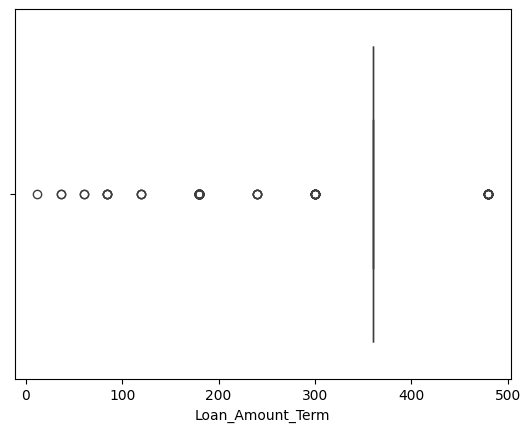

In [20]:
sns.boxplot(x = df['Loan_Amount_Term'],data=df)

In [21]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

<Axes: xlabel='Credit_History'>

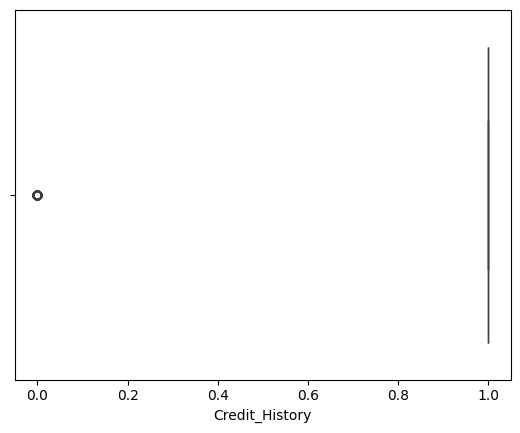

In [22]:
sns.boxplot(x = df['Credit_History'],data=df)

In [23]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [24]:
df['Credit_History'].fillna(1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20660\2930209687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(1,inplace=True)


In [25]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [29]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [30]:
df['Married']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
X['Married'] = X['Married'].map({'No': 0, 'Yes': 1})
X['Self_Employed'] = X['Self_Employed'].map({'No': 0, 'Yes': 1})


In [33]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,0,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,0,1,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban


In [34]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [35]:
ord_enc = OrdinalEncoder()
X['Education'] = ord_enc.fit_transform(X[['Education']])

In [36]:
label_enc = LabelEncoder()
X['Property_Area'] = label_enc.fit_transform(X[['Property_Area']])

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
X.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,0,0,0,0.0,0,5849,0.0,128.0,360.0,1.0,2
1,LP001003,0,1,1,0.0,0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,0,1,0,0.0,1,3000,0.0,66.0,360.0,1.0,2
3,LP001006,0,1,0,1.0,0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,0,0,0,0.0,0,6000,0.0,141.0,360.0,1.0,2
5,LP001011,0,1,2,0.0,1,5417,4196.0,267.0,360.0,1.0,2
6,LP001013,0,1,0,1.0,0,2333,1516.0,95.0,360.0,1.0,2
7,LP001014,0,1,3+,0.0,0,3036,2504.0,158.0,360.0,0.0,1
8,LP001018,0,1,2,0.0,0,4006,1526.0,168.0,360.0,1.0,2
9,LP001020,0,1,1,0.0,0,12841,10968.0,349.0,360.0,1.0,1


In [38]:
X.drop('Loan_ID',axis=1,inplace=True)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 52.9+ KB


In [40]:
# ApplicantIncome       
# CoapplicantIncome     
# LoanAmount           
# Loan_Amount_Term     
# Credit_History       

In [41]:
num_cols = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

In [42]:
num_cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [43]:
for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")


ApplicantIncome: 50 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 41 outliers
Loan_Amount_Term: 88 outliers
Credit_History: 89 outliers


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in num_cols:
    X[col] = scaler.fit_transform(X[[col]])


In [45]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0.0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2
1,0,1,1,0.0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0
2,0,1,0,0.0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2
3,0,1,0,1.0,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2
4,0,0,0,0.0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0.0,0,-0.410130,-0.554487,-0.889500,0.273231,0.411733,0
610,0,1,3+,0.0,0,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,0
611,0,1,1,0.0,0,0.437174,-0.472404,1.276168,0.273231,0.411733,2
612,0,1,2,0.0,0,0.357064,-0.554487,0.490816,0.273231,0.411733,2


In [46]:
X.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000
mean,0.182410,0.653094,0.218241,0.133550,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,-1.620130e-16,1.037459
std,0.386497,0.476373,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.787482
min,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,4.117327e-01,0.000000
50%,0.000000,1.000000,0.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,4.117327e-01,1.000000
75%,0.000000,1.000000,0.000000,0.000000,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,4.117327e-01,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,4.117327e-01,2.000000


In [47]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [48]:
y= y.map({'N':0,'Y':1})


In [49]:
from sklearn.model_selection import train_test_split



In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

-----------------------------------------------------------------------------------

In [51]:
import pandas as pd

In [52]:
df1 = pd.read_csv('loan_data_set.csv')

In [53]:
X = df.drop('Loan_Status',axis = 1)
y = df['Loan_Status']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=42)

In [56]:
from sklearn.impute import SimpleImputer

# numerical columns -> strategy -> numerical -> mean
imputer = SimpleImputer(strategy='mean')


In [57]:
Cat_Col = X.select_dtypes(include='object').columns
Num_Col = X.select_dtypes(include='number').columns 

In [58]:
imputer.fit(X_train[Num_Col])

# we basically training the simple imputer

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [59]:
transformed_data=imputer.transform(X_train[Num_Col])
transformed_data

array([[6.0000e+03, 2.2500e+03, 2.6500e+02, 3.6000e+02, 1.0000e+00],
       [2.9580e+03, 2.9000e+03, 1.3100e+02, 3.6000e+02, 1.0000e+00],
       [6.2500e+03, 1.6950e+03, 2.1000e+02, 3.6000e+02, 1.0000e+00],
       ...,
       [3.2370e+03, 0.0000e+00, 3.0000e+01, 3.6000e+02, 1.0000e+00],
       [1.0047e+04, 0.0000e+00, 1.2800e+02, 2.4000e+02, 1.0000e+00],
       [1.3650e+04, 0.0000e+00, 1.2800e+02, 3.6000e+02, 1.0000e+00]],
      shape=(491, 5))

In [60]:
num_df = pd.DataFrame(transformed_data,columns=Num_Col)

In [61]:
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,6000.0,2250.0,265.0,360.0,1.0
1,2958.0,2900.0,131.0,360.0,1.0
2,6250.0,1695.0,210.0,360.0,1.0
3,2083.0,3150.0,128.0,360.0,1.0
4,4166.0,0.0,98.0,360.0,0.0
...,...,...,...,...,...
486,1875.0,1875.0,97.0,360.0,1.0
487,11417.0,1126.0,225.0,360.0,1.0
488,3237.0,0.0,30.0,360.0,1.0
489,10047.0,0.0,128.0,240.0,1.0


In [62]:
Cat_Col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

In [63]:
cat_imputer = SimpleImputer(strategy='most_frequent')
# it is calculating the mode of each of column and store it from the trainig data
cat_imputer.fit(X_train[Cat_Col])

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [64]:
imputed_cat=cat_imputer.transform(X_train[Cat_Col])

In [65]:
cat_df = pd.DataFrame(imputed_cat,columns=Cat_Col)

In [66]:
num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [67]:
cat_df.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [68]:
#pipeline
#how to handle outlier -> capping , removing outlier